In [2]:
!pip3 install pickle5

In [3]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [4]:
import pickle5 as pickle
with open("./listings.pkl", "rb") as fh:
  data = pickle.load(fh)

In [5]:
data.columns

Index(['Are Pets Allowed', 'Category Idx', 'Day of Advertisement Created',
       'Day of Date Available From', 'Demand', 'Floor', 'Geo Canton',
       'Geo City', 'Geo Zip', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
       'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
       'Is New Construction Potential', 'Is Tenant2Tenant',
       'Is Wheelchairaccessible', 'Listing Description', 'Listing Title',
       'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized',
       'Property Reference Id', 'Size M2 Normalized', 'Subcategory En Idx',
       'Year Built', 'Year Lastrenovated'],
      dtype='object')

In [6]:
data.sample(5)

,Are Pets Allowed,Category Idx,Day of Advertisement Created,Day of Date Available From,Demand,Floor,Geo Canton,Geo City,Geo Zip,Has Balcony,...,Number of Images,Price Extra Normalized,Price Gross Normalized,Price M2 Normalized,Price Net Normalized,Property Reference Id,Size M2 Normalized,Subcategory En Idx,Year Built,Year Lastrenovated
11690,True,APPT,"February 12, 2020","May 1, 2020",8.0,1.0,AG,Berikon,8965,NaN,...,6,218.0,1478.0,18.0,1260.0,0180.76.6808,80.0,Apartment,1975.0,1975.0
17437,True,APPT,"April 29, 2019","July 16, 2019",12.0,1.0,ZH,Dübendorf,8600,NaN,...,5,245.0,1965.0,23.0,1720.0,5546.76.0589,85.0,Apartment,NaN,NaN
12508,False,APPT,"April 5, 2018","July 1, 2018",2.0,6.0,BE,Biel/Bienne,2502,False,...,7,170.0,1020.0,19.0,850.0,2150.61.7648,55.0,Apartment,NaN,NaN
12580,NaN,APPT,"May 13, 2020","July 1, 2020",20.0,0.0,SG,Jona,8645,NaN,...,2,250.0,1450.0,23.0,1200.0,7634.50.1334,64.0,Apartment,1963.0,1990.0
11665,NaN,APPT,"January 9, 2019","March 1, 2017",0.0,3.0,SO,Zuchwil,4528,NaN,...,10,240.0,1230.0,19.0,990.0,7340.22.5834,66.0,Apartment,NaN,NaN


# Data cleaning

In [7]:
#Data cleaning
## Replace binary columns by 0|1
binary_features = ['Are Pets Allowed', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
                  'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
                  'Is New Construction Potential', 'Is Tenant2Tenant',
                  'Is Wheelchairaccessible']
for column in binary_features:
  data.loc[data[column] == False, column] = 0
  data.loc[data[column] == True, column] = 1


#Replace cities, cantons, subcategory etc... by number labels




data.sample(10)

,Are Pets Allowed,Category Idx,Day of Advertisement Created,Day of Date Available From,Demand,Floor,Geo Canton,Geo City,Geo Zip,Has Balcony,...,Number of Images,Price Extra Normalized,Price Gross Normalized,Price M2 Normalized,Price Net Normalized,Property Reference Id,Size M2 Normalized,Subcategory En Idx,Year Built,Year Lastrenovated
15822,0,APPT,"September 21, 2017","October 1, 2017",0.0,0.0,GE,Versoix,1290,0,...,2,345.0,2670.0,33.0,2325.0,9769.92.4593,81.0,Apartment,NaN,NaN
17829,NaN,APPT,"November 15, 2019","March 1, 2020",4.0,2.0,LU,Horw,6048,NaN,...,11,350.0,2430.0,23.0,2080.0,3207.61.2935,106.0,Apartment,1987.0,1987.0
19172,1,APPT,"January 19, 2017","February 16, 2017",3.0,4.0,FR,Fribourg,1700,0,...,1,170.0,930.0,22.0,760.0,4780.06.3420,43.0,Apartment,NaN,NaN
2414,1,APPT,"May 6, 2019","August 1, 2019",2.0,5.0,SG,Rapperswil SG,8640,NaN,...,6,350.0,2655.0,19.0,2305.0,0970.22.3344,141.0,Duplex,NaN,NaN
15633,0,APPT,"March 9, 2018","June 1, 2017",2.0,0.0,FR,Bulle,1630,0,...,7,140.0,1440.0,18.0,1300.0,2303.61.4593,78.0,Apartment,NaN,NaN
3192,NaN,APPT,"April 7, 2021","July 1, 2021",2.0,4.0,LU,Luzern,6014,NaN,...,8,240.0,2000.0,21.0,1760.0,9152.50.5039,96.0,Apartment,NaN,NaN
15664,0,APPT,"August 11, 2018",NaN,1.0,1.0,SG,Steinach,9323,0,...,6,335.0,1995.0,17.0,1660.0,0436.50.8394,115.0,Apartment,NaN,NaN
18624,1,APPT,"January 5, 2022","April 1, 2022",3.0,1.0,VD,Mont-sur-Lausanne,1052,NaN,...,4,200.0,1720.0,31.0,1520.0,7377.22.2130,55.0,Apartment,NaN,NaN
5381,NaN,APPT,"March 8, 2021","June 1, 2021",3.0,3.0,TG,Matzingen,9548,NaN,...,7,160.0,1090.0,12.0,930.0,2029.26.8233,90.0,Apartment,1994.0,1994.0
9516,0,APPT,"May 11, 2018","August 1, 2018",0.0,2.0,BE,Biel/Bienne,2503,0,...,8,320.0,1560.0,17.0,1240.0,6956.61.2935,91.0,Apartment,NaN,NaN


In [8]:
data['Day of Advertisement Created']

0          January 7, 2021
1        November 18, 2019
2           March 15, 2017
3             July 7, 2021
4         November 3, 2017
               ...        
19995      January 4, 2018
19996     November 3, 2021
19997     October 15, 2021
19998      October 1, 2020
19999         May 11, 2017
Name: Day of Advertisement Created, Length: 20000, dtype: object

In [9]:
features = data[['Are Pets Allowed', 'Category Idx', 'Day of Advertisement Created',
       'Day of Date Available From', 'Floor', 'Geo Canton',
       'Geo City', 'Geo Zip', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
       'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
       'Is New Construction Potential', 'Is Tenant2Tenant',
       'Is Wheelchairaccessible', 'Listing Description', 'Listing Title',
       'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized',
       'Property Reference Id', 'Size M2 Normalized', 'Subcategory En Idx',
       'Year Built', 'Year Lastrenovated']]

label = data['Demand']

label.describe()


count    20000.000000
mean         8.648900
std         18.275794
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        672.000000
Name: Demand, dtype: float64

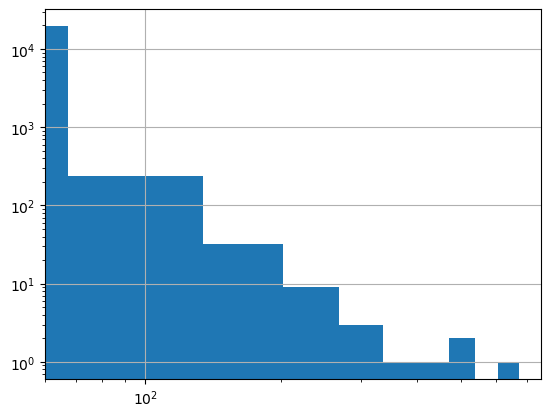

In [10]:
# ax = sns.histplot(label, kde=True, stat='density', color='blue', label='prop of likes')
# plt.legend()
# plt.show()
label.hist()
plt.xscale('log')
plt.yscale('log')

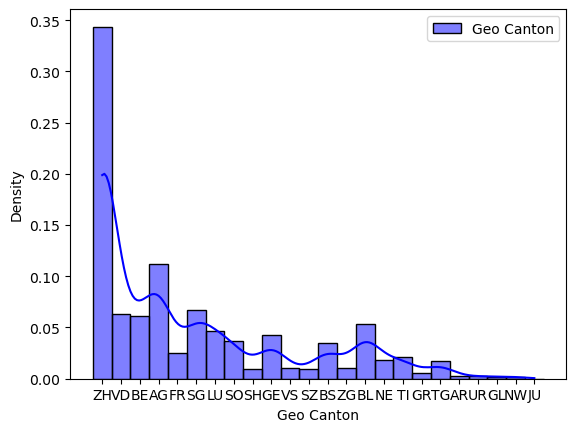

In [11]:
ax = sns.histplot(features['Geo Canton'], kde=True, stat='density', color='blue', label='Geo Canton')

plt.legend()
plt.show()

In [13]:
output_cols = list(data['Demand'])

input_cols = data[['Are Pets Allowed', 'Floor', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
       'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
       'Is New Construction Potential', 'Is Tenant2Tenant',
       'Is Wheelchairaccessible', 'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized', 'Size M2 Normalized']]

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

input_cols_norm = mean_norm(input_cols)
input_cols_norm.fillna(input_cols_norm.median(), inplace=True)
input_cols_norm.sample(10)

,Are Pets Allowed,Floor,Has Balcony,Has Cabletv,Has Elevator,Has Fireplace,Has Garage,Has Parking,Is New Construction,Is New Construction Potential,...,Livingspace,Number Of Rooms,Number Of Rooms Cleaned,Number of Documents,Number of Images,Price Extra Normalized,Price Gross Normalized,Price M2 Normalized,Price Net Normalized,Size M2 Normalized
4993,-0.832208,-0.602958,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,1.133462,0.162390,0.162390,0.673477,-0.380680,0.223548,0.252508,-0.124062,0.240979,1.133513
8496,-0.832208,0.326060,-0.200172,0.758779,0.798902,-0.156072,0.899897,1.090902,-0.079381,-0.125677,...,-0.803121,-0.749144,-0.749144,-1.484066,-1.362701,-1.021228,0.196205,0.031593,0.330901,-0.803395
10585,-0.832208,-0.602958,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,-0.380594,-0.293377,-0.293377,0.673477,0.928681,-0.647795,-0.584991,-0.096593,-0.545833,-0.380797
7492,1.201510,-0.602958,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,0.006723,-0.293377,-0.293377,0.673477,-0.380680,-0.398840,-0.338668,-0.105750,-0.313536,0.006585
4973,-0.832208,1.255078,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,0.851777,0.162390,0.162390,0.673477,-0.708021,-0.025407,0.280659,-0.105750,0.300927,0.851781
16477,1.201510,-0.138449,-0.200172,0.758779,0.798902,-0.156072,0.899897,1.090902,-0.079381,-0.125677,...,0.746146,1.073924,1.073924,0.673477,0.601341,0.472503,-0.409046,-0.151530,-0.493379,0.746132
208,-0.832208,-1.067466,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,0.323618,-0.749144,-0.749144,0.673477,-0.053340,-0.149885,0.787381,-0.041656,0.855442,0.323534
2235,-0.832208,-1.067466,-0.200172,0.758779,0.798902,-0.156072,0.899897,1.090902,-0.079381,-0.125677,...,-0.486226,-0.749144,-0.749144,-1.484066,0.274000,0.099070,-0.036042,-0.041656,-0.051265,-0.486446
8490,-0.832208,2.184095,-0.200172,-1.317803,-1.251618,-0.156072,-1.111143,-0.916588,-0.079381,-0.125677,...,-0.556647,-0.749144,-0.749144,0.673477,-0.380680,-0.523318,-0.521651,-0.078281,-0.493379,-0.556879
3640,1.201510,-1.067466,-0.200172,0.758779,0.798902,-0.156072,0.899897,1.090902,-0.079381,-0.125677,...,0.429250,0.162390,0.162390,-1.484066,-0.053340,0.845936,-0.310517,-0.133218,-0.433431,0.429183


# Regression using SkLearn

In [14]:
#Regression using sklearn
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

L = [10, 100, 1000]

for c in L:
  X = input_cols_norm.to_numpy()
  model = lm.LogisticRegression(C=c, max_iter=30)

  X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.33, random_state=42)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(c, "-->  accuracy = ", accuracy_score(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 -->  accuracy =  0.2193939393939394


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100 -->  accuracy =  0.2190909090909091
1000 -->  accuracy =  0.21924242424242424


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Regression using PyTorch

In [28]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.autograd import Variable
import torchvision.models as models


In [15]:
#Classification with Pytorch

#Un exemple 
Sample_X_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
Sample_Y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))

class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        predict_y = self.linear(x)
        return predict_y


#We create the model
linear_model = LinearRegression()


define_criterion = torch.nn.MSELoss(size_average=False)
SGD_optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)



#We train the data
for epoch in range(10):
  predict_y = linear_model(Sample_X_data)
  loss = define_criterion(predict_y, Sample_Y_data)
  
  SGD_optimizer.zero_grad()
  loss.backward()

  SGD_optimizer.step()
  print('epoch {}, loss function {}'.format(epoch, loss.item()))

test_variable = Variable(torch.Tensor([[4.0]]))
predict_y = linear_model(test_variable)
print("The result of predictions after training", 4, linear_model(test_variable).item())



epoch 0, loss function 80.56354522705078
epoch 1, loss function 36.30256652832031
epoch 2, loss function 16.59254264831543
epoch 3, loss function 7.811995983123779
epoch 4, loss function 3.8970322608947754
epoch 5, loss function 2.1481738090515137
epoch 6, loss function 1.3636929988861084
epoch 7, loss function 1.0086085796356201
epoch 8, loss function 0.8447649478912354
epoch 9, loss function 0.7661392688751221
The result of predictions after training 4 6.874879837036133


/opt/anaconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [16]:
inputs_array, targets_array1 = np.array(input_cols_norm.to_numpy()), label.to_numpy()
targets_array=[]
#We add brakets for tensor structure... (can be done differently)
for elt in targets_array1:
    targets_array.append([elt])
targets_array = np.array(targets_array)


print(type(inputs_array))
print(type(targets_array))
print(inputs_array)
print(targets_array)

inputs = torch.from_numpy(inputs_array).to(torch.float32)
targets = torch.from_numpy(targets_array).to(torch.float32)
dataset = TensorDataset(inputs, targets)

print(dataset)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[-8.32208326e-01 -1.06746644e+00 -2.00171779e-01 ... -1.14905739e-01
   3.49313628e+00  5.39471132e+00]
 [-8.32208326e-01 -6.02957644e-01 -2.00171779e-01 ... -1.41879049e-02
  -5.30846134e-01 -1.19077637e+00]
 [-8.32208326e-01 -6.02957644e-01 -2.00171779e-01 ... -1.51530406e-01
  -3.88470592e-01  8.51781311e-01]
 ...
 [-8.32208326e-01  1.25507753e+00 -2.00171779e-01 ...  4.12442852e-03
   4.80769558e-01 -3.80796600e-01]
 [-8.32208326e-01  2.18409511e+00 -2.00171779e-01 ...  4.99052621e-02
   2.57893544e+00  5.70049217e-01]
 [-8.32208326e-01 -1.06746644e+00 -2.00171779e-01 ... -1.42374239e-01
  -1.29517799e+00 -9.44260787e-01]]
[[25.]
 [ 2.]
 [ 0.]
 ...
 [ 2.]
 [ 2.]
 [ 3.]]


In [17]:
#Train dataset and validation dataset
VAL_PERCENT = 0.2
NUM_ROWS = 20000
val_size = int(NUM_ROWS * VAL_PERCENT)
train_size = NUM_ROWS - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

print(len(train_ds), len(val_ds))

16000 4000


In [18]:
BATCH_SIZE = 128

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

for xb, yb, in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break



inputs: tensor([[-0.8322, -1.0675, -0.2002,  ..., -0.0966,  0.8554,  1.2392],
        [-0.8322,  0.3261, -0.2002,  ...,  0.0224,  1.1687, -0.1695],
        [-0.8322, -1.0675, -0.2002,  ..., -0.0508, -0.1187, -0.5921],
        ...,
        [-0.8322, -1.0675, -0.2002,  ..., -0.1241, -0.1487,  0.7461],
        [-0.8322, -0.6030, -0.2002,  ..., -0.1057,  0.0461,  0.4644],
        [ 1.2015,  0.7906, -0.2002,  ...,  0.0224, -1.1378, -1.8247]])
targets: tensor([[  1.],
        [  3.],
        [ 38.],
        [  1.],
        [  0.],
        [  0.],
        [  7.],
        [  4.],
        [  1.],
        [  0.],
        [  8.],
        [  1.],
        [  0.],
        [  0.],
        [  4.],
        [  0.],
        [  5.],
        [  4.],
        [  0.],
        [  2.],
        [ 10.],
        [ 24.],
        [  5.],
        [  4.],
        [  0.],
        [  7.],
        [  1.],
        [ 42.],
        [  0.],
        [  5.],
        [  1.],
        [  1.],
        [  0.],
        [  0.],
     

In [19]:
#Creation of linear regression model

input_cols = ['Are Pets Allowed', 'Floor', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
       'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
       'Is New Construction Potential', 'Is Tenant2Tenant',
       'Is Wheelchairaccessible', 'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized', 'Size M2 Normalized']

output_cols = ['Demand']

input_size = len(input_cols)
output_size = len(output_cols)

class PredictModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return {'val_loss': loss.detach()}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        if (epoch+1) % 20 == 0 or epoch == num_epochs - 1:
            print("Epoch[{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [20]:
#Defining our model 
model = PredictModel()
list(model.parameters())

[Parameter containing:
 tensor([[-0.1325, -0.0320, -0.0509, -0.1823,  0.0077, -0.0463, -0.1110, -0.1003,
           0.0630,  0.0822,  0.1100, -0.1631,  0.1401, -0.0094, -0.0281,  0.1601,
           0.1531,  0.0466,  0.0020, -0.0186,  0.0268,  0.0879]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.1606], requires_grad=True)]

In [21]:
#Training loop

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history=[]
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

result = evaluate(model, val_loader)
print(result)

{'val_loss': 8.9146089553833}


In [22]:
epochs = 300
lr = 0.000001
history = fit(epochs, lr, model, train_loader, val_loader)

Epoch[20], val_loss: 8.9111
Epoch[40], val_loss: 8.9077
Epoch[60], val_loss: 8.9042
Epoch[80], val_loss: 8.9008
Epoch[100], val_loss: 8.8974
Epoch[120], val_loss: 8.8939
Epoch[140], val_loss: 8.8905
Epoch[160], val_loss: 8.8871
Epoch[180], val_loss: 8.8838
Epoch[200], val_loss: 8.8804
Epoch[220], val_loss: 8.8770
Epoch[240], val_loss: 8.8737
Epoch[260], val_loss: 8.8703
Epoch[280], val_loss: 8.8670
Epoch[300], val_loss: 8.8636


In [23]:
# We try to test our model on a random value of the test set

def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)         
    prediction = predictions[0].detach()
    return prediction

input, target = val_ds[50]
prediction = predict_single(input, target, model)

print("Input:", input)
print("Target:", target)
print("Prediction:", prediction)

Input: tensor([-0.8322, -0.1384, -0.2002,  0.7588,  0.7989, -0.1561,  0.8999, -0.9166,
        -0.0794, -0.1257, -0.1090, -0.0535, -0.3102,  0.6182,  0.6182, -1.4841,
         0.2740,  1.7048, -0.0163, -0.0508, -0.2236, -0.3104])
Target: tensor([62.])
Prediction: tensor([-0.3231])


In [25]:
#Computation of the accurcy of our model on test set
EPSILON = 3

goods = 0
for i in range(len(val_ds)):
    input, target = val_ds[i]
    prediction = predict_single(input, target, model)
    if prediction <= target + EPSILON and prediction >= target - EPSILON:
        goods+=1

accuracy = goods/len(val_ds)
print(accuracy)


0.49425


In [29]:
#We save the model
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')
print("Saved PyTorch Model State to model_weights.pth")

/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/germain/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Saved PyTorch Model State to model.pth


In [30]:
#We load the model

model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
#Another method : Discreticize the values of labels

